# Neural Network Classification with TensorFlow

### Introduction to Neural Network Classification with TensorFlow

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

#### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

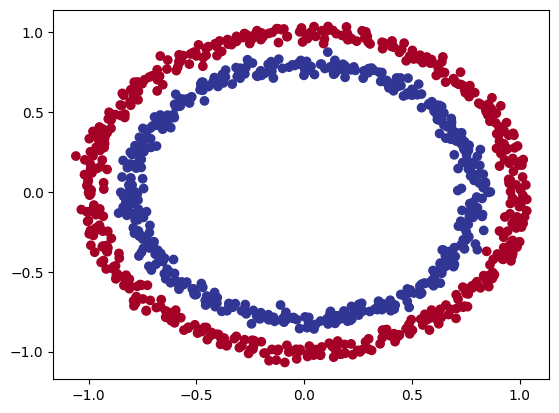

In [8]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

### Input and output shapes

In [9]:
# Check the shapes of the our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of the features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
# X, y = X/255.,y/255.

### Steps in modeling

1. Create or import a model
2. Compile a model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [13]:
# Import TensorFlow Libraries
import tensorflow as tf

tf.__version__

'2.13.0'

### Model 1

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax")
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.4138 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.5999 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 2.8629 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7492 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7089 - accuracy: 0.5030


### Model 2

In [15]:
# Let's try to improve our model
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.5020
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4790
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5030
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.5040
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.4890
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4800


In [16]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5020


[0.6933045387268066, 0.5019999742507935]

### Model 2

In [17]:
# Let's try to improve our model

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax")
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 2.2005 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7182 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6983 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6947 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5120
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.4990
Epoch 11

In [18]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932278871536255, 0.5]

### Improve our model ahead

Let's look into bag of tricks to see how to improve our model

1. Create a model - We might add more layers or increase the number of hidden units within a layer.
2. Compile the model - Here we might to choose a different optimization function such as Adam instead of SGD.
    - Loss - How wrong your model's predictions are compared to the truth labels (you want to minimize this).
    - Optimizer - How your model should update its internal patterns to better it's predictions.
    - Metrics - Human interpretable values for how well your model is doing.  
3. Fit the model - Perhaps we might fit our model for more epochs (leave it training for longer). 
    - Epochs - How many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax"),
    tf.keras.layers.Dense(100),  # Add 100 dense neurons
    tf.keras.layers.Dense(10),  # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

In [20]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.7028 - accuracy: 0.5070


[0.7027588486671448, 0.5070000290870667]

### To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in trainined model, features (X) and label (y)    
* Create a meshgrid to the different X values
* Make predictions across meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.colors as mcolors

In [22]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediction on X.
    
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2-D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class 
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    cmap = mpl.colormaps['RdYlBu'] # viridis'] # plt.cm.get_cmap("Spectral")
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=mpl.colormaps.get_cmap(cmap), alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=mpl.colormaps.get_cmap(cmap))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 4ms/step
Doing binary classification


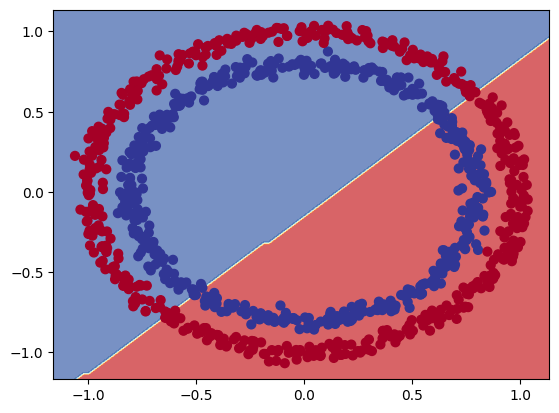

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [25]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [ ]:
# Let's see if our model can be used for a regression problem.
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#Split our regressiion data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(224, 224, 1)),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(3, activation="softmax"),
    tf.keras.layers.Dense(100),  # Add 100 dense neurons
    tf.keras.layers.Dense(10),  # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)